EPITA 2020 MLRF practice_01-02_numpy v2020-04-24_152531 by Joseph CHAZALON

<div style="overflow: auto; padding: 10px; margin: 10px 0px">
<img alt="Creative Commons License" src='img/CC-BY-4.0.png' style='float: left; margin-right: 20px'>
    
This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).
</div>

# Practice session 1 part 2: NumPy-Fu

Make sure you read and understand everything, and complete all the required actions.
**Required actions** are preceded by the following sign:
![Back to work!](img/work.png)

## Preliminary checks

Perform a couple checks…

In [1]:
# deactivate buggy jupyter completion
%config Completer.use_jedi = False

In [2]:
# Make sure we use Python 3
import sys
if sys.version_info.major != 3:
    print("ERROR: not using Python 3.x")
else:
    print("Great! We're using Python version %s" % sys.version)

Great! We're using Python version 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


## Import the required modules
Notice the **line magic** used to configure how matplotlib output is rendered.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## NumPy crash course
NumPy allows you to manipulate n-dimensional arrays (representing matrices, tensors, images…) with a very simple syntax.

### Array creation (1/3)
Here are some examples of array creation:

In [4]:
# Initialize from a sequence
a1 = np.array([1, 2, 3])
a1

array([1, 2, 3])

In [5]:
# Array have arbitrary dimensions…
a2 = np.array([[[ 0,  1], [ 2,  3], [ 4,  5]],
               [[ 6,  7], [ 8,  9], [10, 11]]])
a2

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [6]:
#…but they need to be consistent
a3 = np.array([[[ 0,  1], [ 2,  3], [ 4,  5]],
               [[ 6,  7], [ 8,  9], [10, 11, 13]]])
a3

array([[list([0, 1]), list([2, 3]), list([4, 5])],
       [list([6, 7]), list([8, 9]), list([10, 11, 13])]], dtype=object)

<div style="overflow: auto; border-style: solid; border-color: red; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="stop" src='img/stop.png' style='float: left; margin-right: 20px'>
    
The previous object was created but contains very strange content…
</div>

### `shape` and `dtype`
Shape and content (data) type are two very important properties to check for arrays.

In [7]:
a1.shape, a1.dtype

((3,), dtype('int64'))

In [8]:
a2.shape, a2.dtype

((2, 3, 2), dtype('int64'))

In [9]:
a3.shape, a3.dtype

((2, 3), dtype('O'))

### Array creation (2/3)

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Now try to create some arrays of different types (integers, floating-point numbers, booleans, complex numbers) and shapes.**
</div>

Do not hesitate to check:
- the [online refence](https://docs.scipy.org/doc/numpy-1.16.1/reference/)
- and the [user guide](https://docs.scipy.org/doc/numpy-1.16.1/user/basics.html)

In [10]:
# TODO create a couple of arrays

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>
    
**Now check the [documentation about array creation](https://docs.scipy.org/doc/numpy-1.16.1/reference/routines.array-creation.html) and try some other array creation routines.**
</div>

We recommand that you have a look at:
- `zeros`
- `zeros_like`
- `ones`
- `full`
- `empty`
- `eye`

In [11]:
test_shape = (2, 2)

In [12]:
np.zeros(test_shape)

array([[0., 0.],
       [0., 0.]])

In [13]:
# TODO try the other array creation routines

A very important thing to note with NumPy is that native routines make use of optimized C code which is orders of magnitude faster than Python loops.

**You should always try to avoid writing Python loops to access NumPy arrays, and you should rather try to find a native routine which does the task you are looking for.**

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>
    
**Benchmark the initialization time of some big array using a native routine vs using a `for` loop.**
**Make sure you understand the differences between `%time`, `%%time`, `%timeit` and `%%timeit`.**
</div>

In [14]:
# TODO manual initialization: complete this code
size = 1024*1024
a = np.empty(size)
# for ii in range…
# 

In [15]:
%%timeit
# prof
size = 1024*1024
a = np.empty(size)
for ii in range(len(a)):
    a[ii] = 1

66.6 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
# TODO numpy creation and optimized initialization
a = np.empty(size)
# a[?] = ?

In [17]:
%%timeit
# prof
a = np.empty(size)
a[:] = 1

840 µs ± 64.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
%%timeit
# prof
a = np.empty(size)
a.fill(1)

885 µs ± 80.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
# TODO numpy optimized creation and initialization
# a = ??

In [20]:
%%timeit
# prof
a = np.full(size, 1)

856 µs ± 46.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Array creation (3/3)
There are other very useful array creation routines to be aware of.
Among my favorites are `arange` and `linspace`.

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>
    
**Use iPython's magic `?` to display the documentation for each of those, and create two small arrays.**
</div>

In [21]:
# TODO
np.arange?

### Reshaping
It is easy to change the shape of an array, as long as the new shape is compatible with the original one.

In [22]:
a = np.arange(12)
a.shape

(12,)

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>
    
**Use `reshape(shape)` to give a new shape with 3 dimensions to this array `a`.**
</div>

In [23]:
# TODO reshape

### Apply operations on arrays
All the power of NumPy lies in how we apply operations on arrays.
We can apply operations in 3 different ways:

1. First as **array methods** like this:
```python
a = np.arange(3)
a.max()
```
This technique is useful for operation which consider only the current array.


2. Second by calling a NumPy operation on the array like this:
```python
a = np.linspace(0, 1, 10)
np.cos(a)
```
This second technique is more suitable for mathematical operations which are not directly available as methods, and return an array of the same shape.

3. Third simply by calling natural operations extended to arrays like this:
```python
a = np.arange(0, 3)
b = np.arange(3, 6)
a + b
```

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>
    
**Experiment a couple of operations on arrays.**
</div>

In [24]:
# TODO some operations on arrays

### Indexing: access elements
You can also access individual values of arrays using advanced slicing techniques:

In [25]:
aa = np.arange(3*2).reshape((3, 2))
aa

array([[0, 1],
       [2, 3],
       [4, 5]])

In [26]:
aa[0]

array([0, 1])

In [27]:
aa[0][1]

1

We can specify slices for each dimension.

In [28]:
aa[0,1]

1

In [29]:
aa[1:3]

array([[2, 3],
       [4, 5]])

In [30]:
aa[:,1]

array([1, 3, 5])

In [31]:
aa[::2,::-1]

array([[1, 0],
       [5, 4]])

We can select multiple values using sequences of indexes, mixing [basic](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing) and [advanced](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing) slicing and indexing.

In [32]:
aa

array([[0, 1],
       [2, 3],
       [4, 5]])

In [33]:
aa[(0,0)]  # equivalent to aa[0,0]

0

In [34]:
aa[(1,1,2), 0]  # equivalent to aa[(1, 1, 2), (0, 0, 0)] because of broadcast
                # selects aa[1,0], aa[1,0], aa[2,0]

array([2, 2, 4])

We can even add new axis on the fly:

In [35]:
bb = aa[:, 0, np.newaxis]
bb.shape

(3, 1)

Note that `np.newaxis` is actually `None`, so you it is common to use `None` directly.

In [36]:
np.newaxis

In [37]:
bb = aa[:, 0, None]
bb.shape

(3, 1)

And you can create **masks** and apply them. This is **very powerful!**

In [38]:
aa = np.arange(10)
mask = aa > 5
mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [39]:
aa[mask]

array([6, 7, 8, 9])

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>
    
**Try to extract even numbers in the following `a` array.**
</div>

In [40]:
a = np.array([[1, 0, 2], [3, 7, 9], [1, 0, 2], [3, 7, 9], [3, 7, 9]])
a

array([[1, 0, 2],
       [3, 7, 9],
       [1, 0, 2],
       [3, 7, 9],
       [3, 7, 9]])

In [41]:
# TODO correct this line
a_extracted = a[:]

In [42]:
# prof
# v1: indexes
a_extracted = a[(0,2),1:]
a_extracted

# v2: mask (better, but flattened)
a_extracted = a[a%2 == 0]
a_extracted

array([0, 2, 0, 2])

In [43]:
# Here is a test to check your result
if np.all(a_extracted % 2 == 0):
    print("Looks good!")
else:
    print("Error.")

Looks good!


Make sure to read at least once in your life (no during this session though) [the page about NumPy indexing](https://docs.scipy.org/doc/numpy-1.16.1/user/basics.indexing.html).

### Broadcasting
Broadcasting is a very powerful concept in NumPy, and maybe its greatest strength.
However, it takes times to master it and even then you sometimes get surprised.


According to [the official documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html):
> The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python.

It is easy to make use of broadcasting:
- if you add two arrays, then you broadcast their values;
- if you multiply an array by a scalar, you broadcast again;
- and if you want to apply a look up table to an array, then you can perform it using broadcasting.
Of course, those are only a few examples of what broadcasting makes possible.

Let's have a look at some examples now.

First NumPy operations are usually done element-by-element which requires two arrays to have exactly the same shape:

In [44]:
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
a * b

array([2, 4, 6])

NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

In [45]:
a = np.array([1,2,3])
b = 2
a * b

array([2, 4, 6])

The broadcasting applied in the previous example virtually "streches" `b` to match `a`'s shape.
This can be illustrated by the following figure:
![numpy broadcasting 1](img/practice_01/theory.broadcast_1.gif)

The rule governing whether two arrays have compatible shapes for broadcasting can be expressed in a single sentence.

> **The Broadcasting Rule:**
>
> **In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one.**

Here are more examples (taken from the documentation, again):

In [46]:
a = np.array([[ 0,  0,  0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])
b = np.array([0, 1, 2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

A two dimensional array multiplied by a one dimensional array results in broadcasting if number of 1-d array elements matches the number of 2-d array columns.
![numpy broadcast2](img/practice_01/theory.broadcast_2.gif)

However, when the trailing dimensions of the arrays are unequal, broadcasting fails because it is impossible to align the values in the rows of the 1st array with the elements of the 2nd arrays for element-by-element addition.
![numpy broadcast fail](img/practice_01/theory.broadcast_3.gif)

In [47]:
a = np.array([[ 0,  0,  0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])
b = np.array([0, 1, 2, 3])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

The following example shows an outer addition operation of two 1-d arrays that produces the same result as the previous (working) example.
Here the `newaxis` index operator inserts a new axis into `a`, making it a two-dimensional 4x1 array.

In [48]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

The following figure illustrates the stretching of both arrays to produce the desired 4x3 output array.
![numpy broadcast 4](img/practice_01/theory.broadcast_4.gif)

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Display the shape of a when we add it a new axis like in the previous example.**
</div>

In [49]:
# TODO display the shape of a when we add it a new axis like in the previous example
a.shape

(4,)

### Apply an operation along an axis
Most of the aggregation function allow you to specify the axis along which the computation will be performed.
`axis=0` means the first axis, `axis=i` means the $i+1$ axis, **`axis=-1` means the last axis.**

This allows, for example, to compute the warmest month for each city (or the warmest city for each month).

In [50]:
# Some probably buggy stats
data = np.array([
    # January,February,March,April,May,June,July,August,September,October,November,December
    [14,14,16,18,22,25,28,29,26,23,18,15],  # Ajaccio
    [14,14,16,18,22,26,29,29,26,22,17,15],  # Bastia
    [5,7,12,15,20,24,26,26,22,17,10,5],  # Bourg-Saint-Maurice
    [10,11,14,17,21,25,29,28,25,19,14,10],  # Carcassonne
    [6,8,12,15,20,24,27,26,22,17,10,6],  # Grenoble
    [6,8,13,16,21,25,28,27,23,17,11,7],  # Lyon
    [11,13,16,19,23,27,30,30,26,21,15,12],  # Marseille
    [8,10,15,18,22,26,30,29,24,19,12,9],  # Montelimar
    [12,13,16,18,22,26,29,29,25,21,15,12],  # Montpellier
    [13,13,15,17,21,24,27,28,25,21,17,14],  # Nice
    [12,13,16,18,22,26,29,29,25,21,16,13],  # Perpignan
    [13,14,16,18,22,26,30,30,26,21,16,14],  # Toulon
])
months = np.array(["January","February","March","April","May","June","July",
          "August","September","October","November","December"])
cities = np.array(["Ajaccio", "Bastia", "Bourg-Saint-Maurice", "Carcassonne", 
          "Grenoble", "Lyon", "Marseille", "Montelimar", "Montpellier", 
          "Nice", "Perpignan", "Toulon"])

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>
    
**Display the warmest month for each city. Use the `argmax` operation on `data` with appropriate `axis` parameter.**
</div>

In [51]:
# TODO use the `argmax` operation on `data`
warmest_months = np.zeros(12, dtype=int)  # FIXME replace this line
warmest_months

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
list(zip(cities, months[warmest_months]))

[('Ajaccio', 'January'),
 ('Bastia', 'January'),
 ('Bourg-Saint-Maurice', 'January'),
 ('Carcassonne', 'January'),
 ('Grenoble', 'January'),
 ('Lyon', 'January'),
 ('Marseille', 'January'),
 ('Montelimar', 'January'),
 ('Montpellier', 'January'),
 ('Nice', 'January'),
 ('Perpignan', 'January'),
 ('Toulon', 'January')]

In [53]:
# prof
list(zip(cities, months[data.argmax(axis=1)]))

[('Ajaccio', 'August'),
 ('Bastia', 'July'),
 ('Bourg-Saint-Maurice', 'July'),
 ('Carcassonne', 'July'),
 ('Grenoble', 'July'),
 ('Lyon', 'July'),
 ('Marseille', 'July'),
 ('Montelimar', 'July'),
 ('Montpellier', 'July'),
 ('Nice', 'August'),
 ('Perpignan', 'July'),
 ('Toulon', 'July')]

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>
    
**Display the warmest city for each month. Use the `argmax` operation on `data` with appropriate `axis` parameter.**
</div>

In [54]:
# TODO

In [55]:
# prof
list(zip(months, cities[data.argmax(axis=0)]))

[('January', 'Ajaccio'),
 ('February', 'Ajaccio'),
 ('March', 'Ajaccio'),
 ('April', 'Marseille'),
 ('May', 'Marseille'),
 ('June', 'Marseille'),
 ('July', 'Marseille'),
 ('August', 'Marseille'),
 ('September', 'Ajaccio'),
 ('October', 'Ajaccio'),
 ('November', 'Ajaccio'),
 ('December', 'Ajaccio')]

###  Gluing arrays together
You can "glue" arrays together as long as their shape is compatible.

In [56]:
a = np.arange(3*2).reshape((3,2))
b = np.arange(3*2).reshape((3,2))

In [57]:
np.hstack((a,b))

array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [4, 5, 4, 5]])

In [58]:
np.vstack((a,b))

array([[0, 1],
       [2, 3],
       [4, 5],
       [0, 1],
       [2, 3],
       [4, 5]])

In [59]:
np.stack((a,b), axis=-1)

array([[[0, 0],
        [1, 1]],

       [[2, 2],
        [3, 3]],

       [[4, 4],
        [5, 5]]])

### Copies vs views
Array indexing may not copy the memory but returns a view instead.
**In this case, changing the view changes the original array.**
Make sure to make a copy of the original array, or of the view's underlying data, if you do not want to use the same object twice!

The simplest case is when a reference is copied (either during assignment or during a function call).

In [60]:
a = np.array([10, 20, 30])
b = a
b += 1
a

array([11, 21, 31])

You can use the `copy()` method to perform a deep copy of some array.

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>
    
**Use `copy()` to copy `a` values into `b`, then update `b` without changing `a`.**
</div>

In [61]:
# TODO copy a into b instead of creating an extra reference to the same object
a = np.array([10, 20, 30])
b = a
b += 1
a

array([11, 21, 31])

In [62]:
# prof
a = np.array([10, 20, 30])
b = a.copy()
b += 1
a

array([10, 20, 30])

Slicing an array returns a view of it!

In [63]:
a = np.array([10, 20, 30])
s = a[1:]
s += 1
a

array([10, 21, 31])

###  Linear algebra and other NumPy tools

Just for the record, NumPy also contains [many linera algebra and other useful routines](https://docs.scipy.org/doc/numpy/reference/routines.html) for statistics, mathematics, random sampling, etc.

You'll discover them progressively.

## Matplotlib survival guide
You can plot data using the simple **stateful** `plt` interface.
You start by creating a figure with
```python
plt.figure()
```
then you plot some data, plots are added to the current figure:
```python
plt.plot([0, 1, 2, 3], [1, 3, 5, 7])
plt.plot([0, 1, 2, 3], [2, 4, 6, 8])
```
and finally you call the rendering function:
```python
plt.show()
```

Here is a more complete example you will be able to reuse:

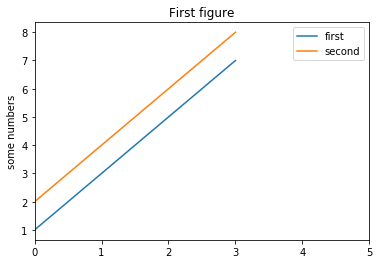

In [64]:
plt.figure()
plt.plot([0, 1, 2, 3], [1, 3, 5, 7], label='first')
plt.plot([0, 1, 2, 3], [2, 4, 6, 8], label='second')
plt.legend()
plt.title("First figure")
plt.ylabel('some numbers')
plt.xlim(0, 5)
plt.show()

And another one showing two images in two different subfigures.

In [65]:
img1 = plt.imread('img/warning.png')
img2 = plt.imread('img/stop.png')

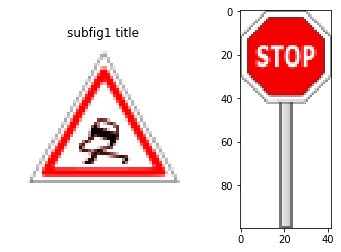

In [66]:
plt.figure()
plt.subplot(1, 2, 1) # values: total number of rows, total number of columes, index (starting at 1)
plt.imshow(img1)
plt.axis('off')
plt.title("subfig1 title")
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('on')
plt.show()

Another example with an histogram.

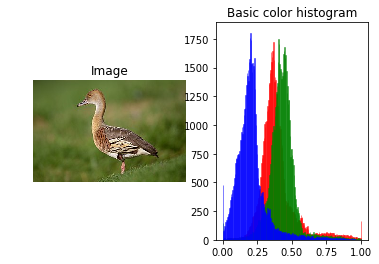

In [68]:
sample_img = plt.imread("img/practice_01/sample_img.png") # matplotlib's imread only supports PNG files
# This is just a numpy array!
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(sample_img)
plt.axis('off')
plt.title("Image")
plt.subplot(1,2,2)
# numpy ravel() returns a flatten array.
plt.hist(sample_img[..., 0].ravel(), bins=256, fc='r', ec='r', alpha=0.5)
plt.hist(sample_img[..., 1].ravel(), bins=256, fc='g', ec='g', alpha=0.5)
plt.hist(sample_img[..., 2].ravel(), bins=256, fc='b', ec='b', alpha=0.5)
plt.title("Basic color histogram")
plt.show()

There are many possible graph types, and many options to configure colors, legends, markers, to add annotations, etc. You will discover them by practicing and by looking at examples.

Let's just finish this very quick introduction to Matplotlib by pointing out useful resources:
- [Tutorials](https://matplotlib.org/tutorials/index.html) to get the basic concepts;
- [PyPlot examples](https://matplotlib.org/gallery/index.html#pyplots-examples) to copy code samples from;
- [PyPlot API reference](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) for full information.

# Job done!
Great! Now you're ready to move on to the next stage: [Image manipulations](practice_01-03_image-manipulations.ipynb).